In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Helper Functions to Read  and Display images

In [2]:
# Function to read image.
def imread_rgb(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Function to display image.
def imshow(img, figsize = (7, 7)):
    plt.figure(figsize = figsize)
    plt.imshow(img, cmap = 'gray')
    plt.show()

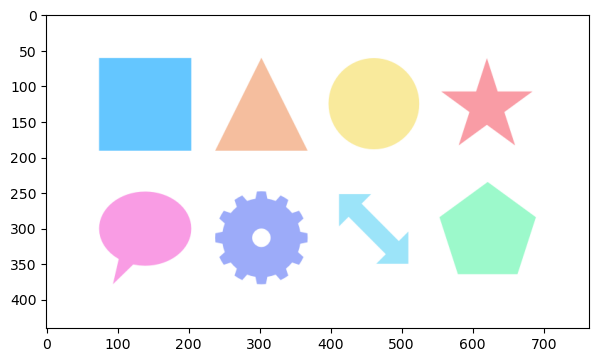

In [14]:
img_shapes = imread_rgb('data/shapes_geometric.png')

imshow(img_shapes)

# Converting Images To Gray

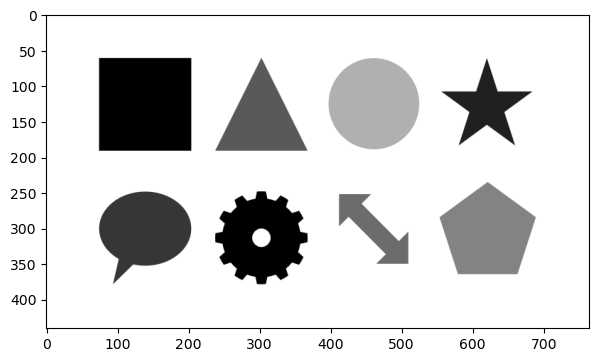

In [4]:
gray_img = cv2.cvtColor(img_shapes, cv2.COLOR_RGB2GRAY)

imshow(gray_img)

# Threshold (Converting To Binary)

240.0


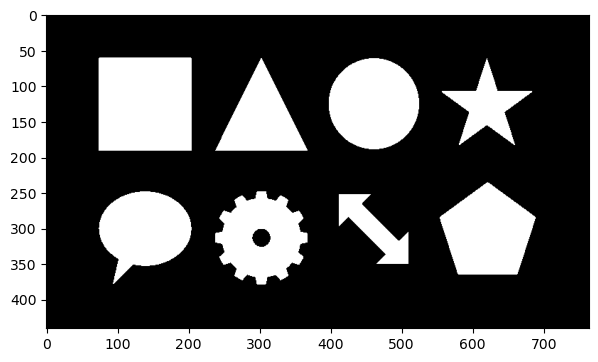

In [5]:
t, img_shapes = cv2.threshold(
    gray_img,
    240,
    255,
    cv2.THRESH_BINARY_INV
)

# The value of threshold using otsu.
print(t)

# Show the image.
imshow(img_shapes)

# Connected Component Labeling

In [6]:
# Using the Connection Component Labeling.
nLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_shapes, connectivity = 4)

In [7]:
# To show number of object in image.
nLabels

9

In [8]:
# Matrix of all pixels in the image.
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

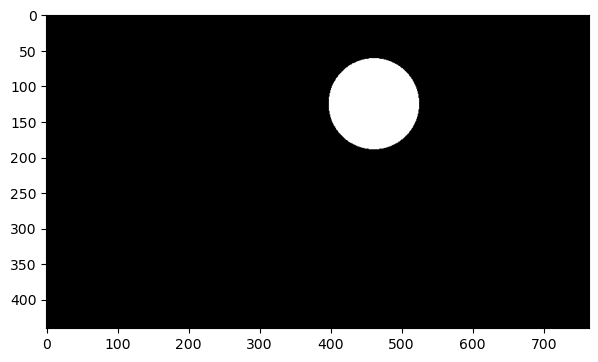

In [9]:
# To choose object from the image to show it only.
mask = (labels == 3)

# Show specific object.
imshow(mask)

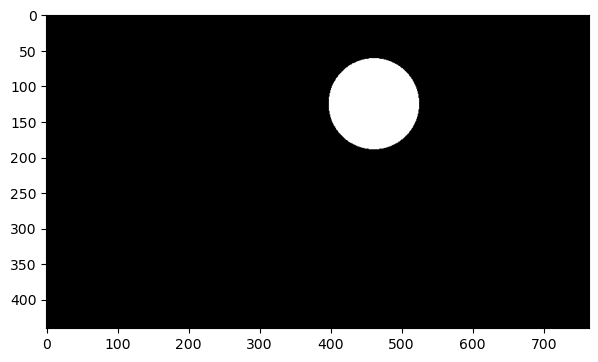

In [10]:
mask = mask.astype('uint8')

# To make segmentaion to image.
# To appear object with color alone.
img_seg = cv2.bitwise_and(img_shapes, img_shapes, mask = mask)

# show image before segmentaion.
imshow(img_seg)                 # Change index of shape to make segmentaion in another shape.

In [11]:
# Show five variable to each shape in image.
# Variable ==> x  y  w  h  area
stats

array([[     0,      0,    764,    441, 254765],
       [    74,     61,    131,    131,  17159],
       [   238,     62,    130,    130,   8571],
       [   398,     62,    127,    128,  12791],
       [   557,     62,    127,    122,   5324],
       [   554,    236,    135,    130,  12218],
       [    74,    249,    131,    130,  11084],
       [   238,    249,    130,    131,  10998],
       [   412,    253,     98,     98,   4014]], dtype=int32)

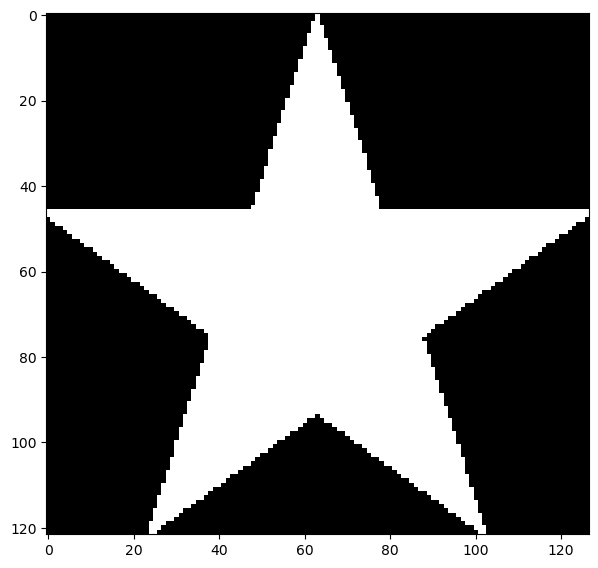

In [12]:
# Save four parameter to use it to separate object. 
x, y, w, h, area = stats[4]

# Take object from image.
img_slice = img_shapes[y: y+h, x: x+w]

# show part of image.
imshow(img_slice)

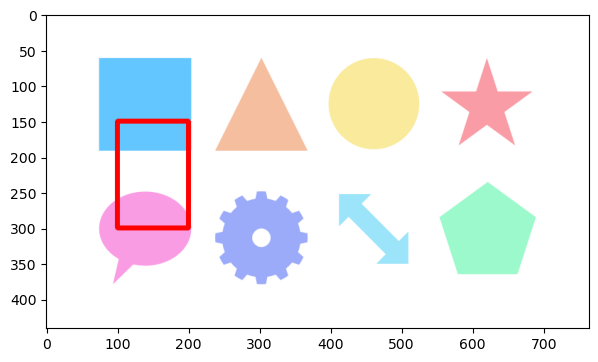

In [15]:
img_copy = img_shapes.copy()

# Take five parameter ==> (img, upparleft, lowerRight, color, sizeColor) 
cv2.rectangle(img_copy, (100, 150), (200, 300), (255, 0, 0), 5)

imshow(img_copy)

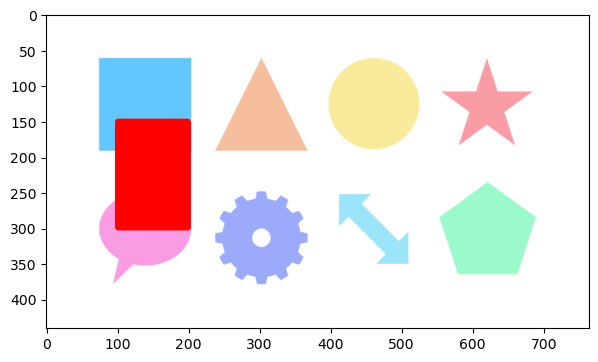

In [16]:
# If sizeColor = negative number so that fill the shape.
cv2.rectangle(img_copy, (100, 150), (200, 300), (255, 0, 0), -1)

imshow(img_copy)

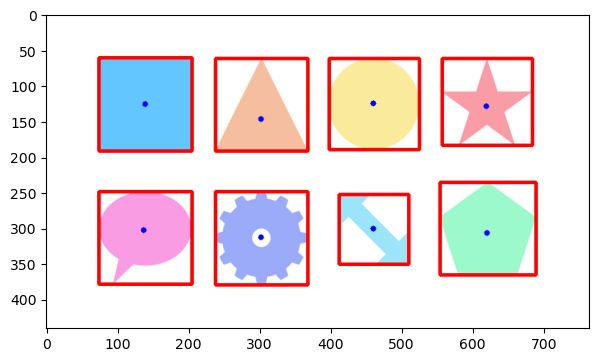

In [17]:
# Take copy from obiginal image to avoid drown in origial image.
img = img_shapes.copy()

centroid = centroids.astype(int)

for i in range(1, nLabels):
    x, y, w, h, area = stats[i]
    (cx, cy) = centroid[i]
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
    cv2.circle(img, (cx, cy), 4, (0, 0, 255), -1)
    
    
# Show image with locations of detect component.
imshow(img)

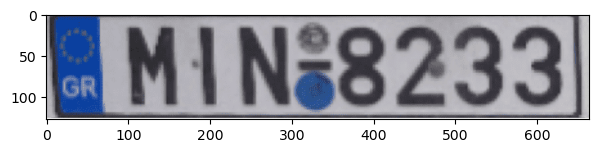

In [18]:
# Read the image.
img_plate = imread_rgb('data/car-plate.png')

# Show the image.
imshow(img_plate)

119.0


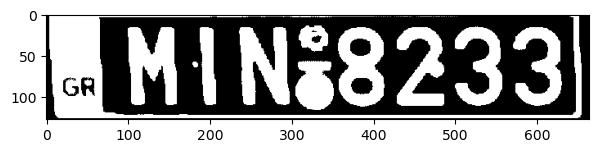

In [19]:
# Converting image from rgb to gray.
img_plate_gray = cv2.cvtColor(img_plate, cv2.COLOR_RGB2GRAY)

t, img_plate_bin = cv2.threshold(
    img_plate_gray,
    0,
    255,
    cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV
)

# Show the best threshold.
print(t)

# Show Binary Image.
imshow(img_plate_bin)

# Detect And Showing Connected Component

In [20]:
# Detect connected component.
component = cv2.connectedComponentsWithStats(img_plate_bin, connectivity = 4)

(nLabels, labels, stats, centroids) = component

centroids = centroids.astype(int)

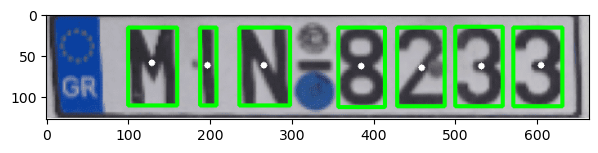

In [23]:
# Take copy from image to avoid work in the orignal image.
img = img_plate.copy()

for i in range(1, nLabels):
    x, y, w, h, area = stats[i]
    (cx, cy) = centroids[i]
    
    # To delete any noise and detect number only.
    acceptWidth = (w > 10 and w < 100)
    acceptHeight = (h > 80 and h < 120)
    
    if acceptWidth and acceptHeight: 
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
        cv2.circle(img, (cx, cy), 4, (255, 255, 255), -1)

    
# Show the image.
imshow(img)

# Helper Function

In [63]:
import os
  
"""
    Input: image RGB.
    Output: detect all abject in the image.    
       
    This function take image to tranfer it to gray
    and make connected component labeling on it to
    detect all the object in image.
"""
def detect_connected_component(
    img_rgb,
    w_range = None,
    h_range = None,
    output_folder = None,
):
    # Convert image to gray.
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    
    # Convert gray image to binary.
    t, img_bin = cv2.threshold(
        img_gray,
        0,
        255,
        cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV
    )
    
    # Detect connected comonent.
    component = cv2.connectedComponentsWithStats(
        img_bin, connectivity = 4
    )
    
    (nLabels, labes, stats, centroids) = component
    
    centroids = centroids.astype(int)
    
    # Copy image to avoid work on original image.
    img = img_rgb.copy()
    
    # Convert image to BGR to save it.
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    for i in range(1, nLabels):
        x, y, w, h, area = stats[i]
        (cx, cy) = centroids[i]
    
        # By default give inatial value true.
        acceptWidth = True
        acceptHeight = True
    
        # Check if width and hwight are within range.
        if w_range: 
            acceptWidth = (w > w_range[0] and w < w_range[1])
            
        if h_range:
            acceptHeight = (h > h_range[0] and h < h_range[1])
            
        if acceptWidth and acceptHeight:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
            cv2.circle(img, (cx, cy), 4, (255, 255, 255), -1)
        
        # To save the image in folder.
        if output_folder:
            img2 = img_rgb[y: y+h, x: x+w]
            cv2.imwrite('{}/object{}.png'.format(output_folder, i), img2)
            
    imshow(img)

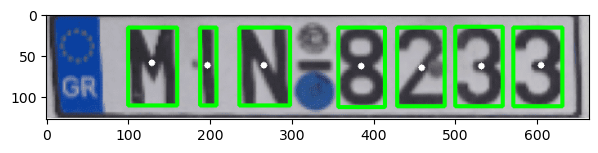

In [55]:
# Test your function.
detect_connected_component(
    img_plate,
    w_range = (10, 100),
    h_range = (80, 120),
    output_folder = 'number'
)

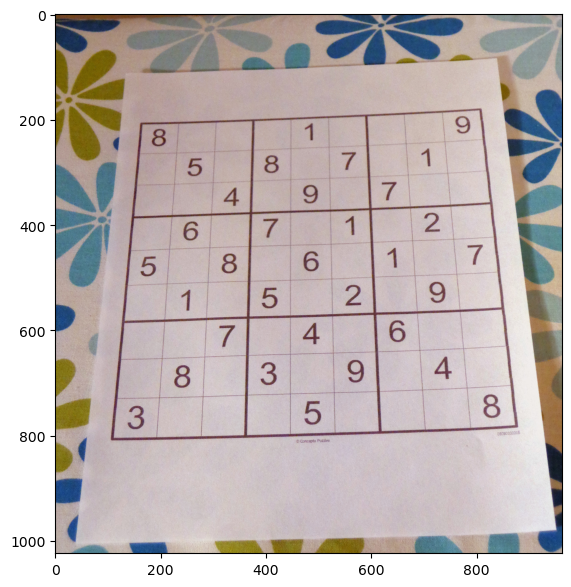

In [31]:
# Read the image.
img_sudoku = imread_rgb('data/sudoku.jpg')

# show the image.
imshow(img_sudoku)

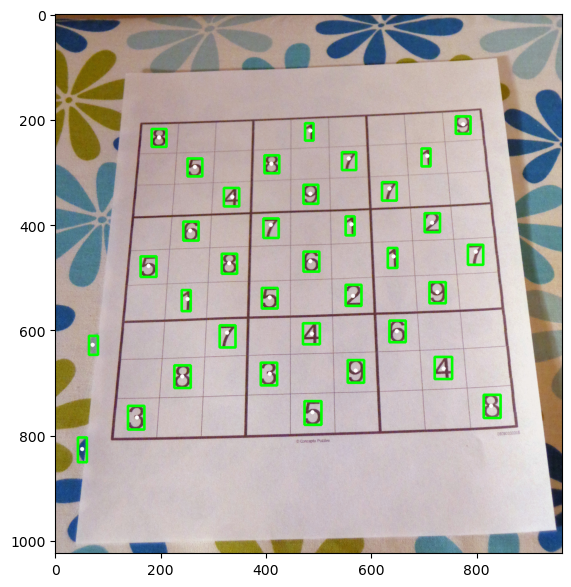

In [41]:
detect_connected_component(
    img_sudoku,
    w_range = (15, 50),
    h_range = (20, 50)
)